In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams["figure.figsize"] = (20,10)

# 1 Kalman Filter

#### i)

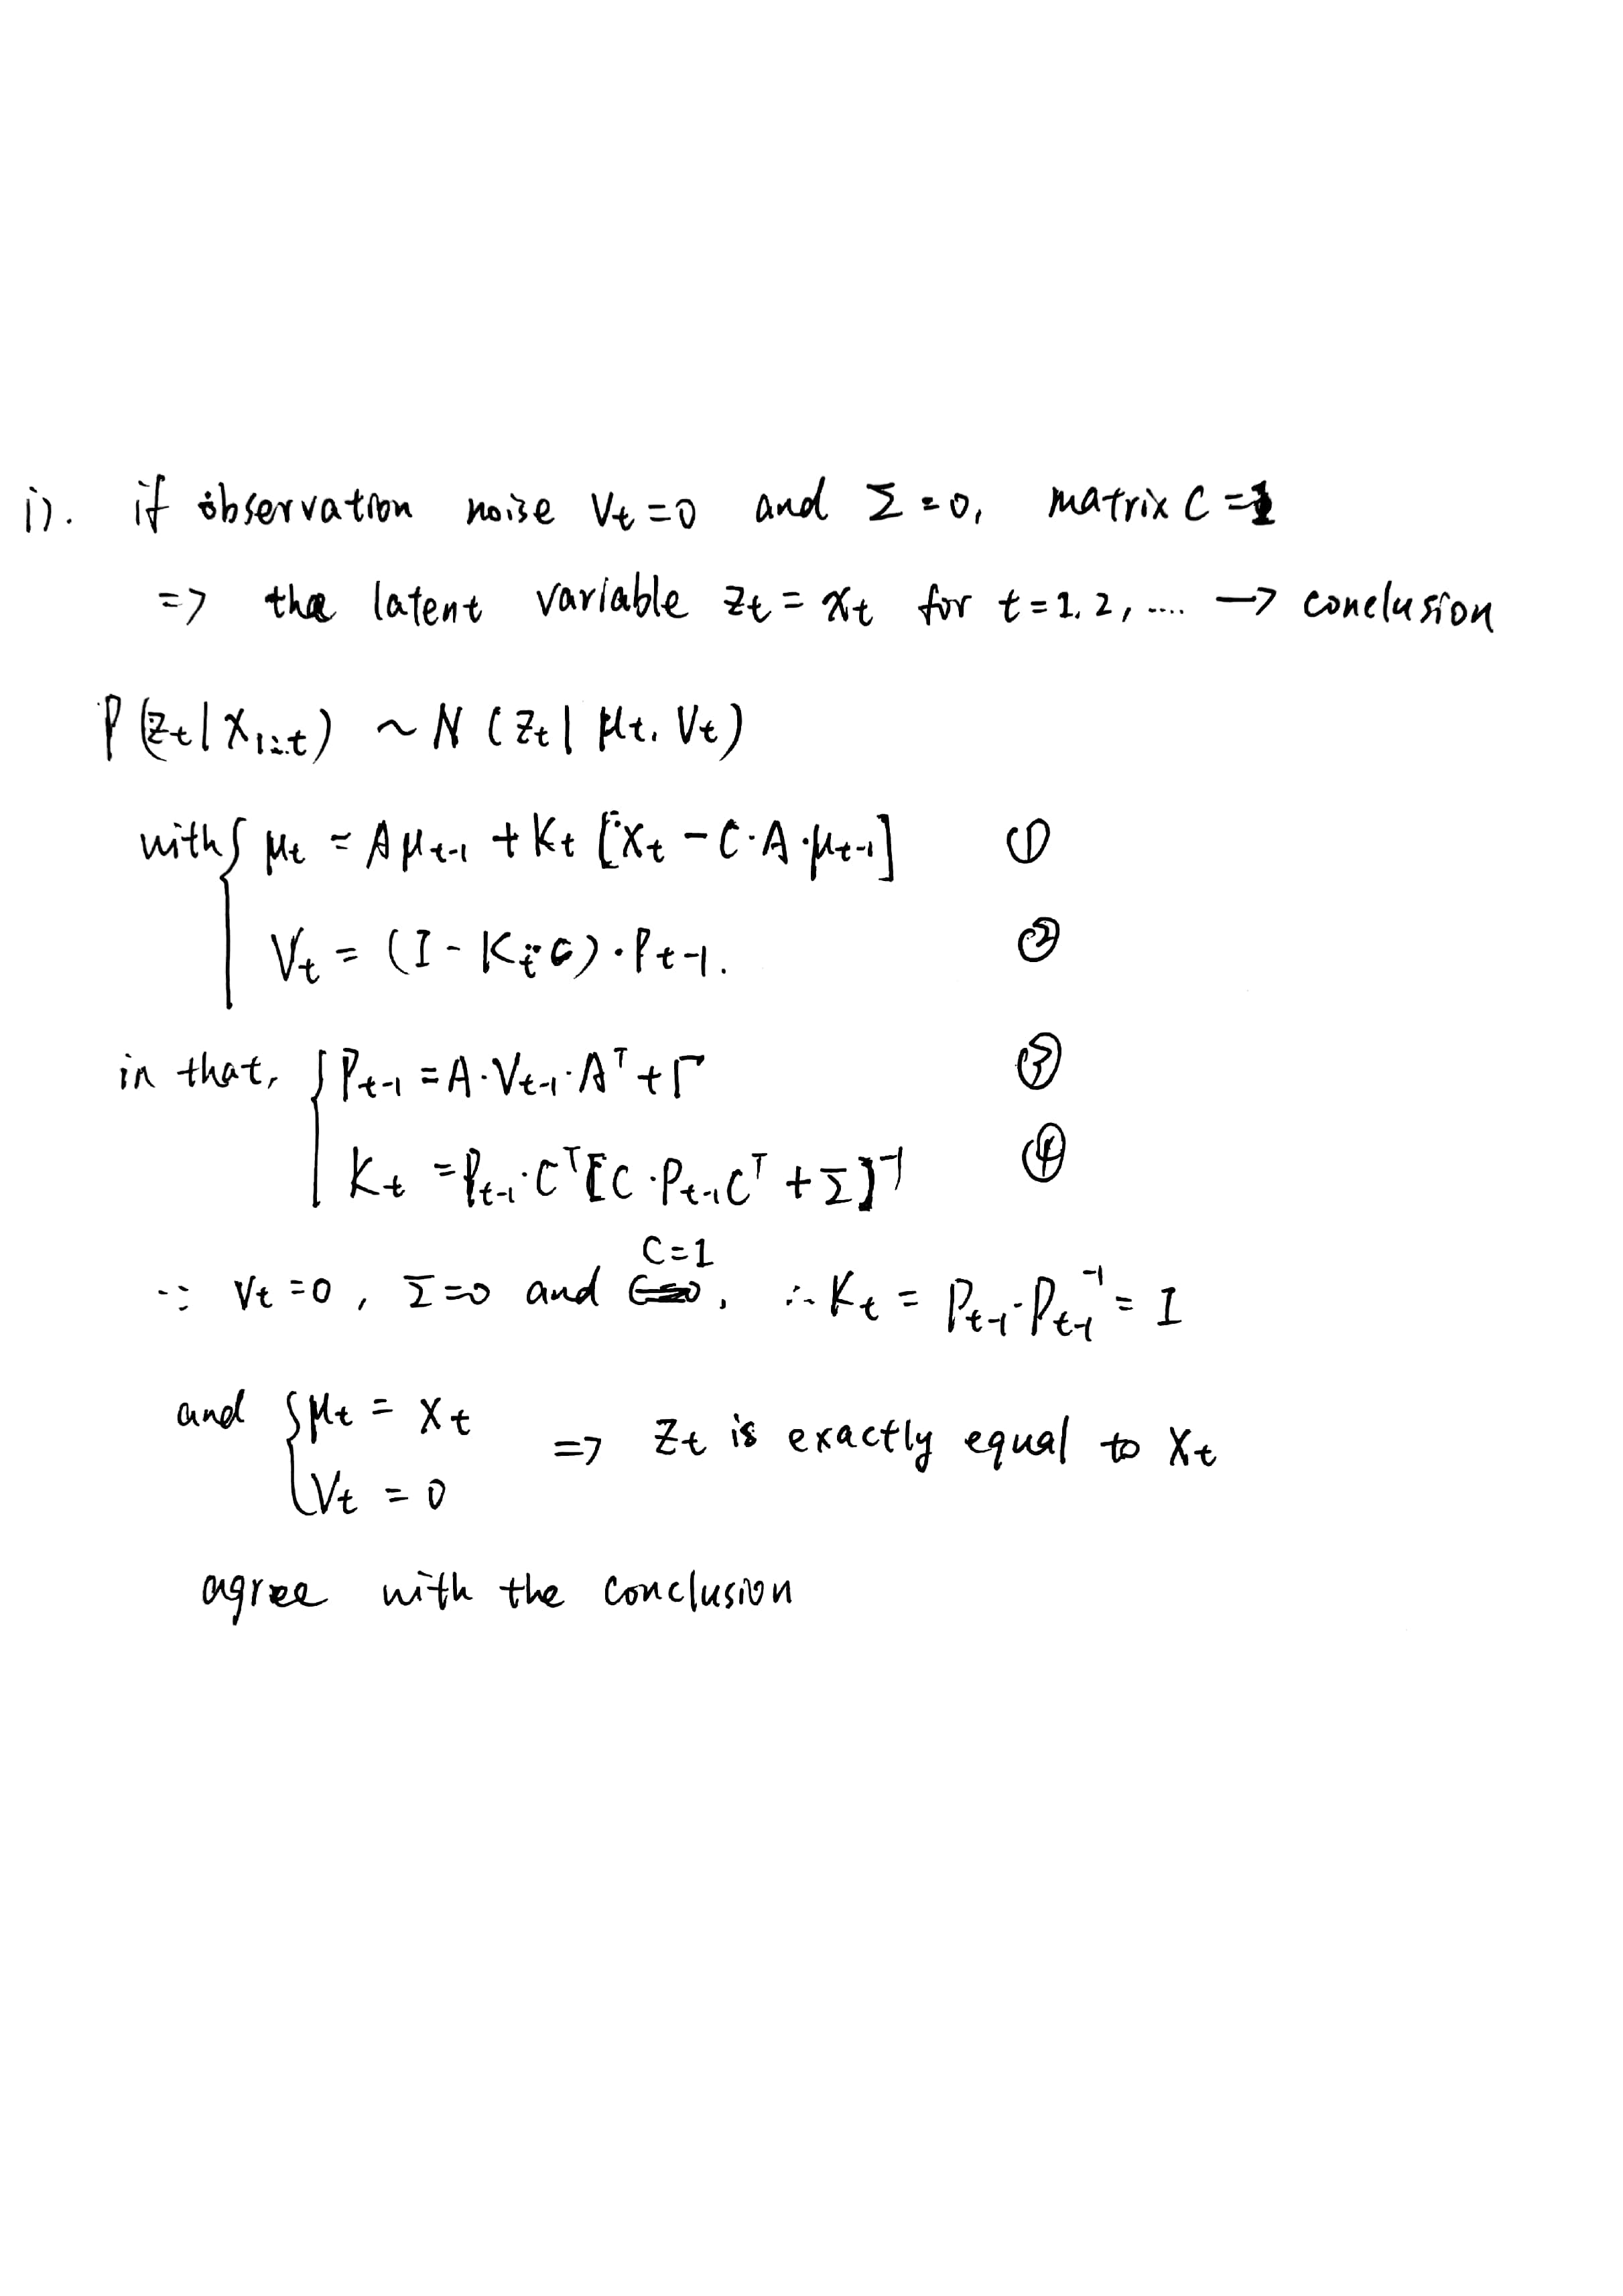

In [7]:
Image(filename = "solution 1.1.png")

#### ii)

In [8]:
estimate_x = np.load("kalman.npy")

In [9]:
# z: latent variable
# f: posterior mean
# F: posterior covariance
# P: prior covariance
# A: transition matrix
# C: emission matrix
def KalmanFilter(z, f, F, A, covariance_z, covariance_x, C, count, store_x):
    x = (C.dot(z.T)).T + np.random.multivariate_normal(mean=[0,0], cov=covariance_x, size = 1)  # x(t)
    z = (A.dot(z.T)).T + np.random.multivariate_normal(mean=[0,0,0,0], cov=covariance_z, size = 1)  # z(t + 1)
    store_x[count] = x
    P = covariance_z + A.dot(F).dot(A.T)
    kalman_coefficient = P.dot(C.T).dot(np.linalg.inv(C.dot(P0).dot(C.T) + covariance_x))

    # posterior mean and covariance
    f = A.dot(f.T) + kalman_coefficient.dot((x - C.dot(A).dot(f.T)).T).T
    F = (np.identity(4) - kalman_coefficient.dot(C)).dot(P)
    
    # posterior distribution
    p = np.random.multivariate_normal(mean=np.ravel(f), cov=F, size = 1)
    f = f.ravel()
    p = p.ravel()

    count += 1
    
    if count < len(estimate_x) -1: # len == 15
        return KalmanFilter(z, f, F, A, covariance_z, covariance_x, C, count, store_x) # recursively
    else:
        return x, z, f, F, p, store_x

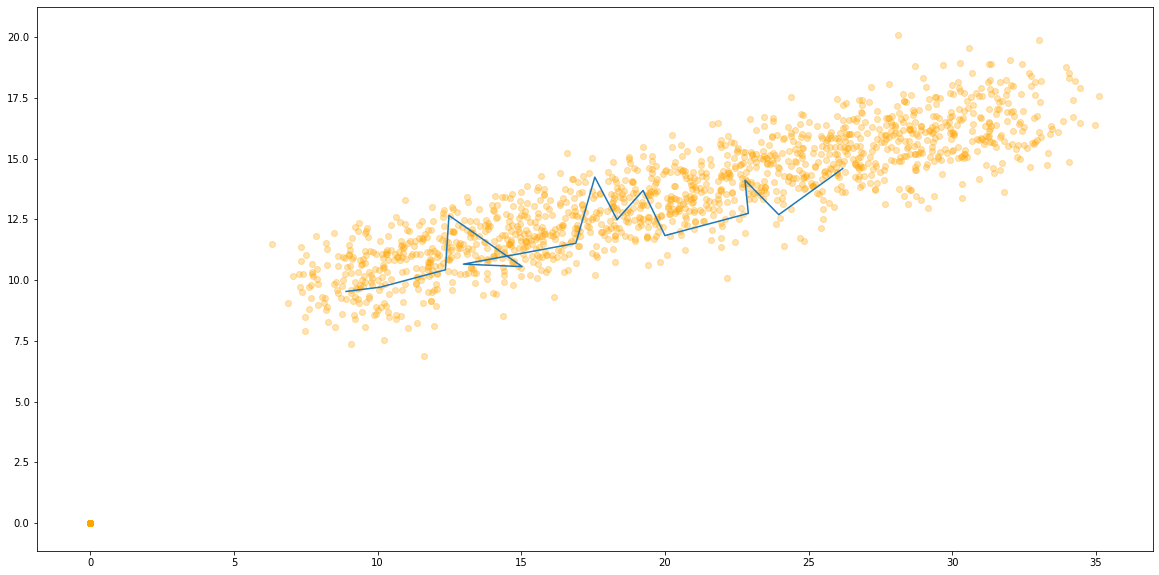

In [25]:
# parameters initialization
f0 = np.array([8, 10, 1, 0])
P0 = np.identity(4) 
transition = np.array([[1, 0, 1, 0],
                      [0, 1, 0, 1], 
                      [0, 0, 1, 0], 
                      [0, 0, 0, 1]])
covariance_z = 0.001 * np.identity(4) 
covariance_x = np.identity(2)
emission = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0]])

# Initialize the parameters
z_init = f0 + np.random.multivariate_normal(mean=[0,0,0,0], cov=P0, size = 1)
kalman_init = P0.dot(emission.T).dot(np.linalg.inv(emission.dot(P0).dot(emission.T) + covariance_x))
F0 = (np.identity(4) - kalman_init.dot(emission)).dot(P0)

for i in range(100):
    x, z, f, F, p, store= KalmanFilter(z_init, f0, F0, transition, covariance_z, covariance_x, emission, count=0, store_x=np.zeros((len(estimate_x), 2)))
    plt.scatter(store[:,0], store[:,1], color='orange', alpha=0.3)
plt.plot(estimate_x[:,0], estimate_x[:,1])

# 2 Ilastik + Multicut for Instance Segmentation

#### ii)

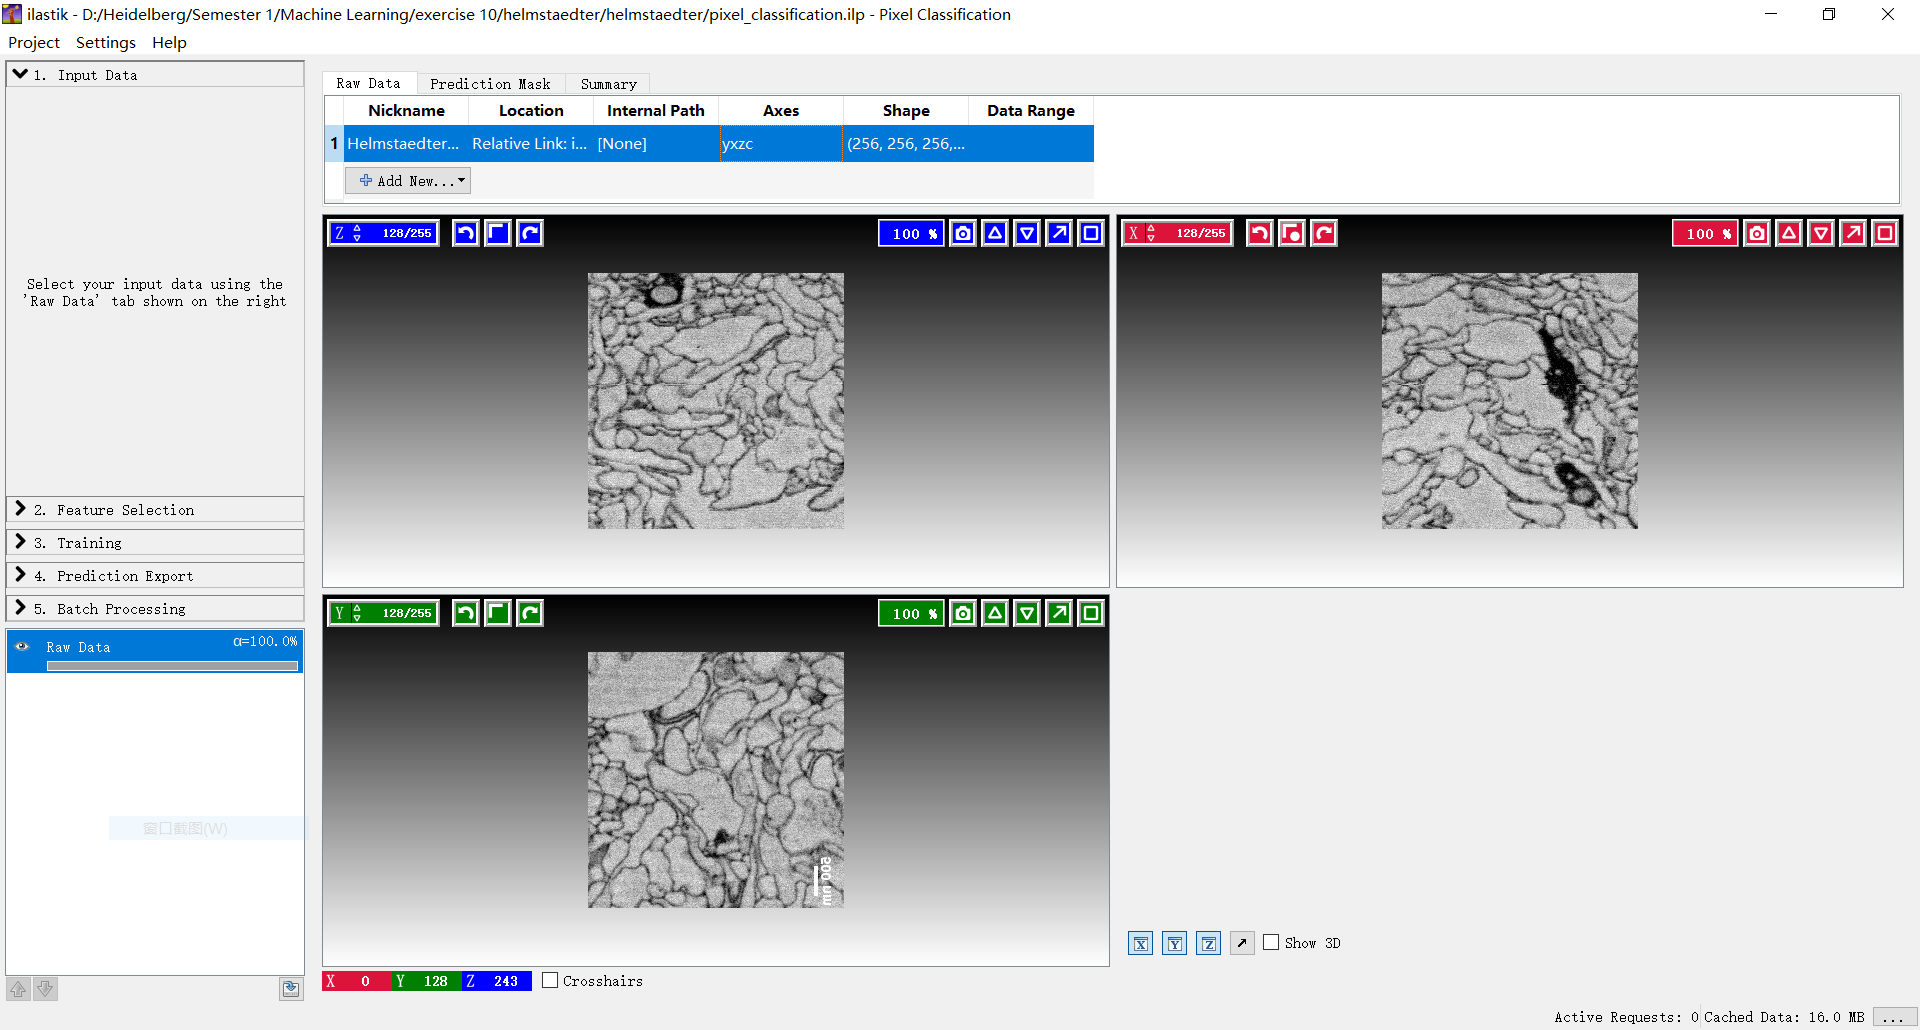

In [63]:
Image(filename = "01Select the raw data.PNG")

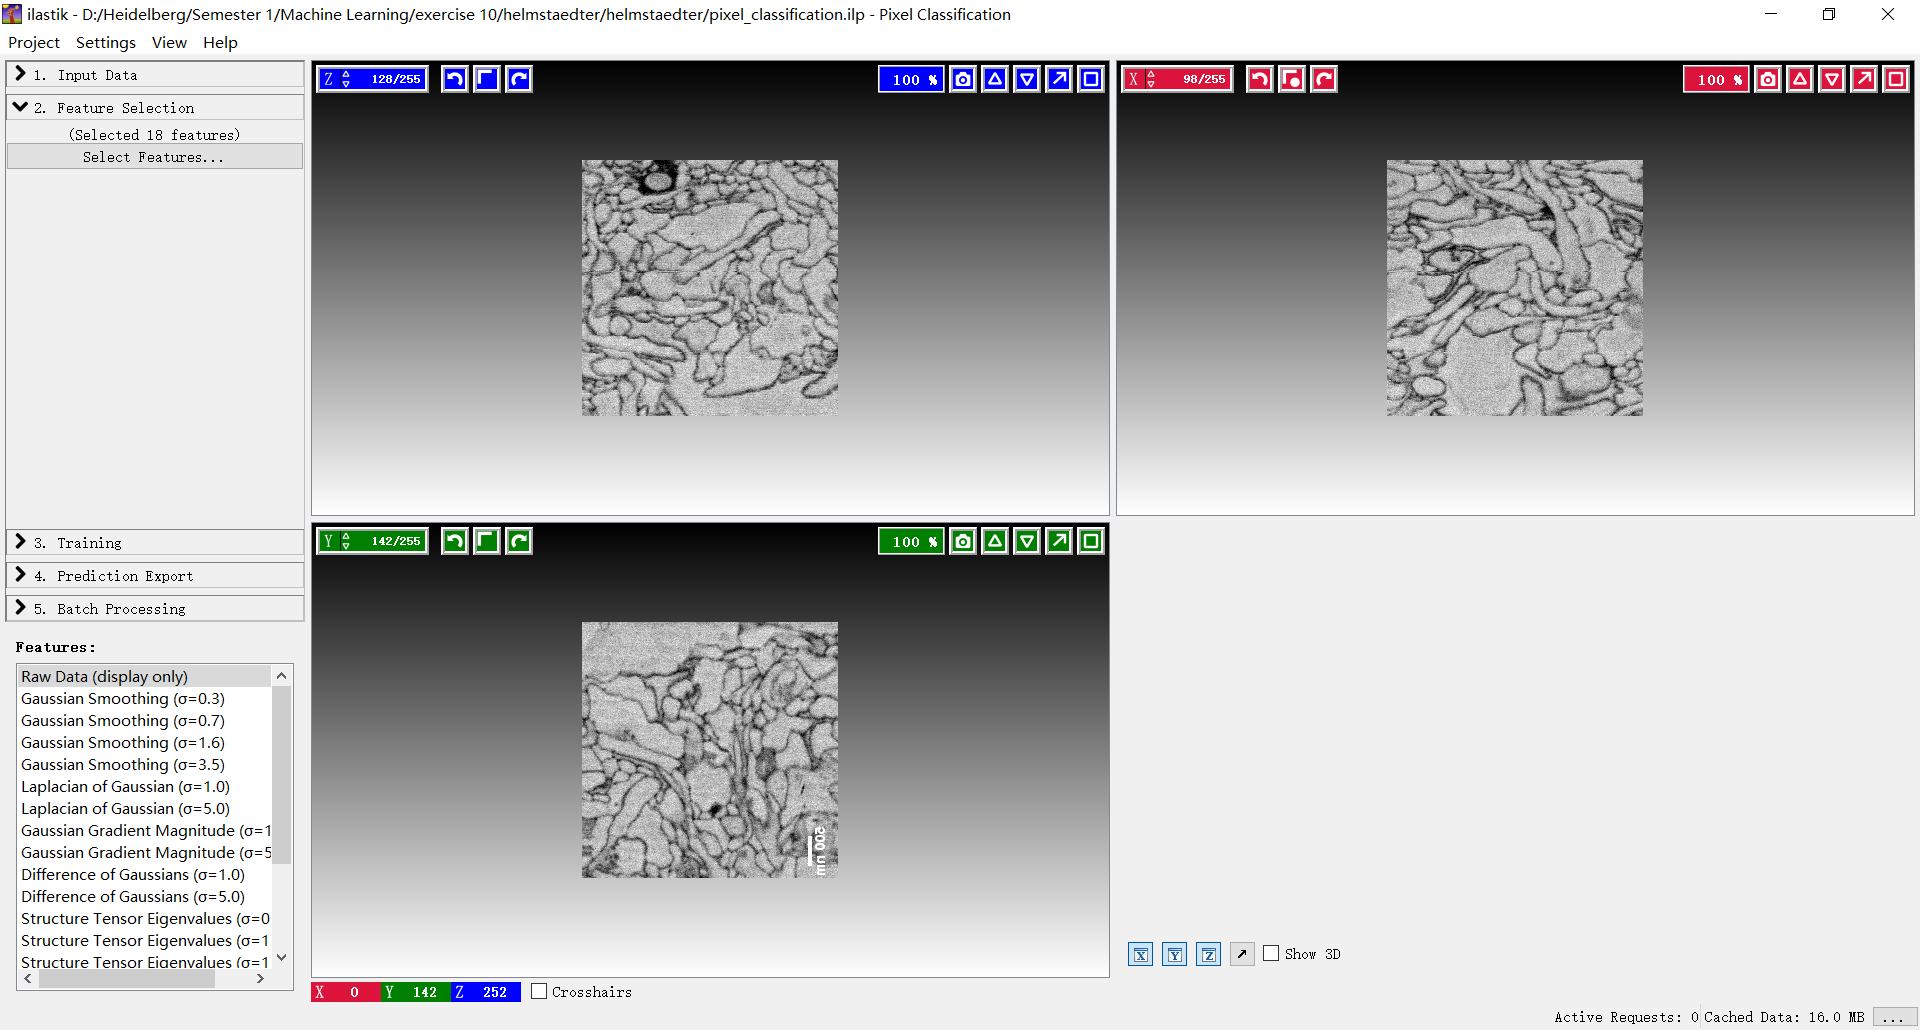

In [64]:
Image(filename = "02Feature selection.PNG")

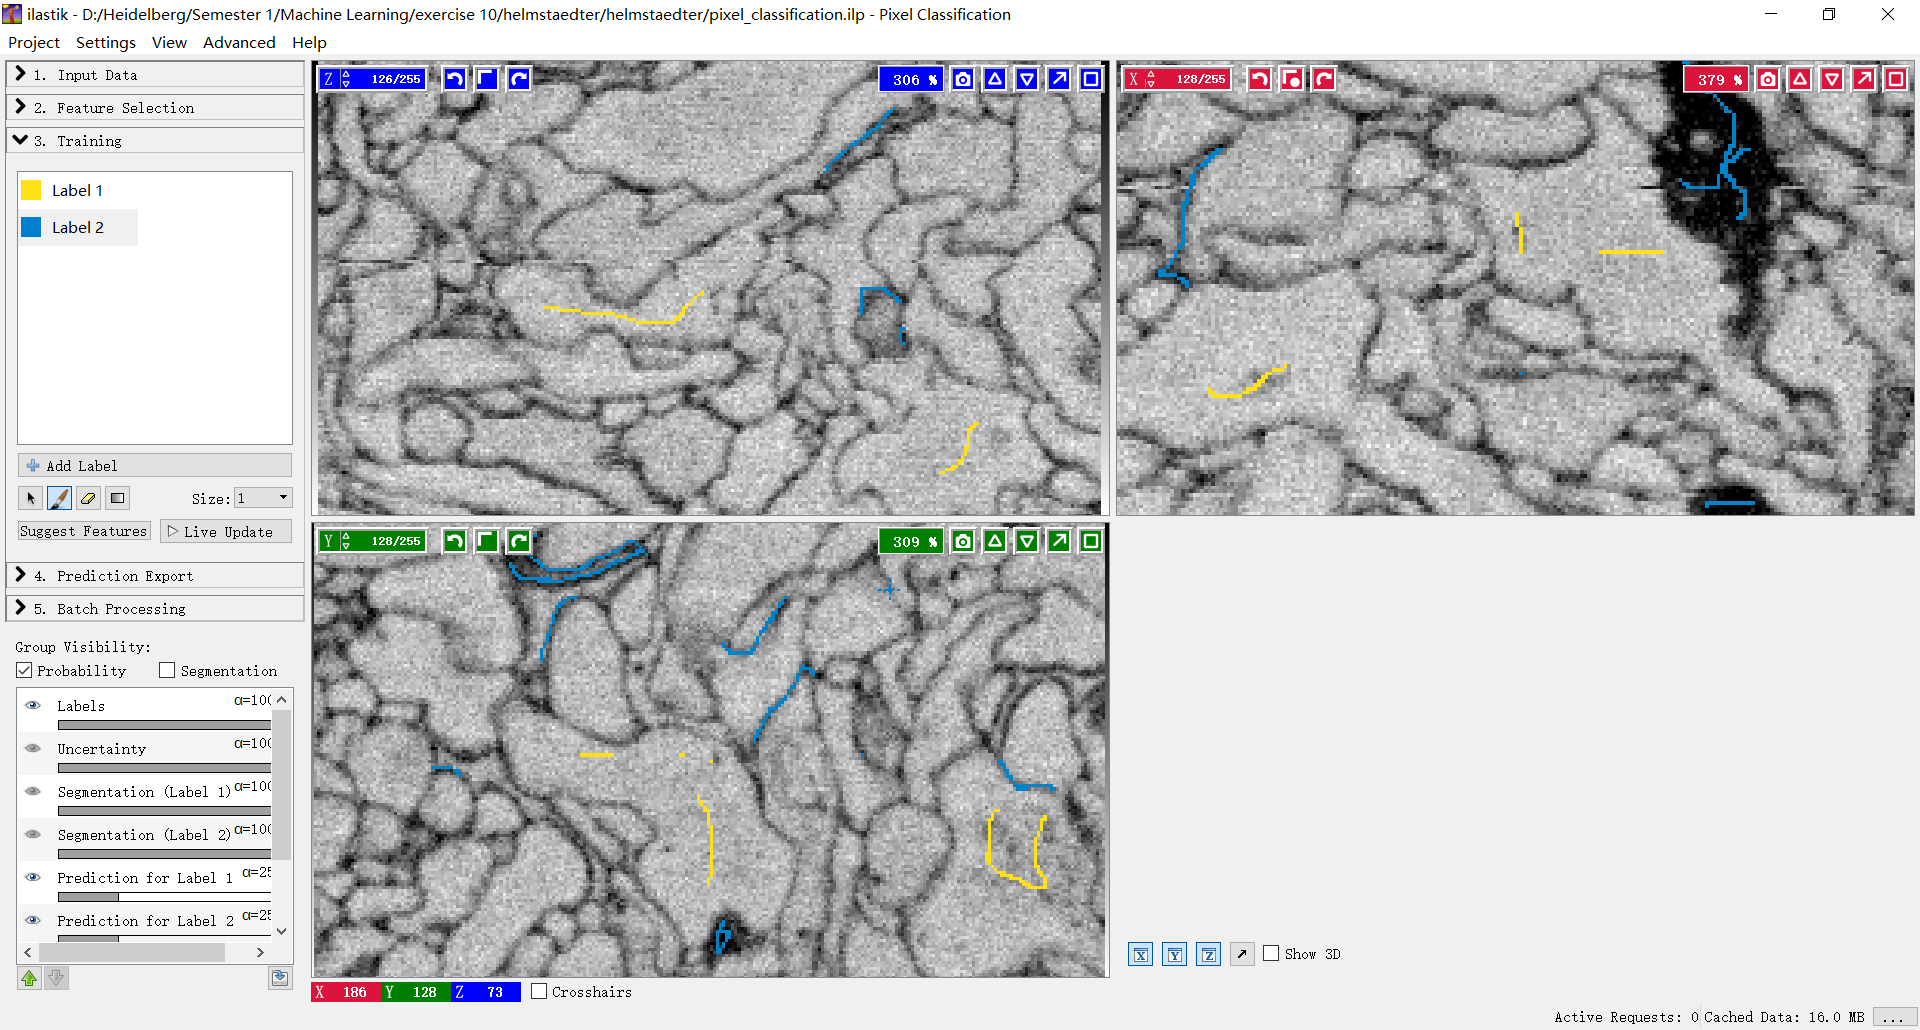

In [65]:
Image(filename = "03Add labels.PNG")

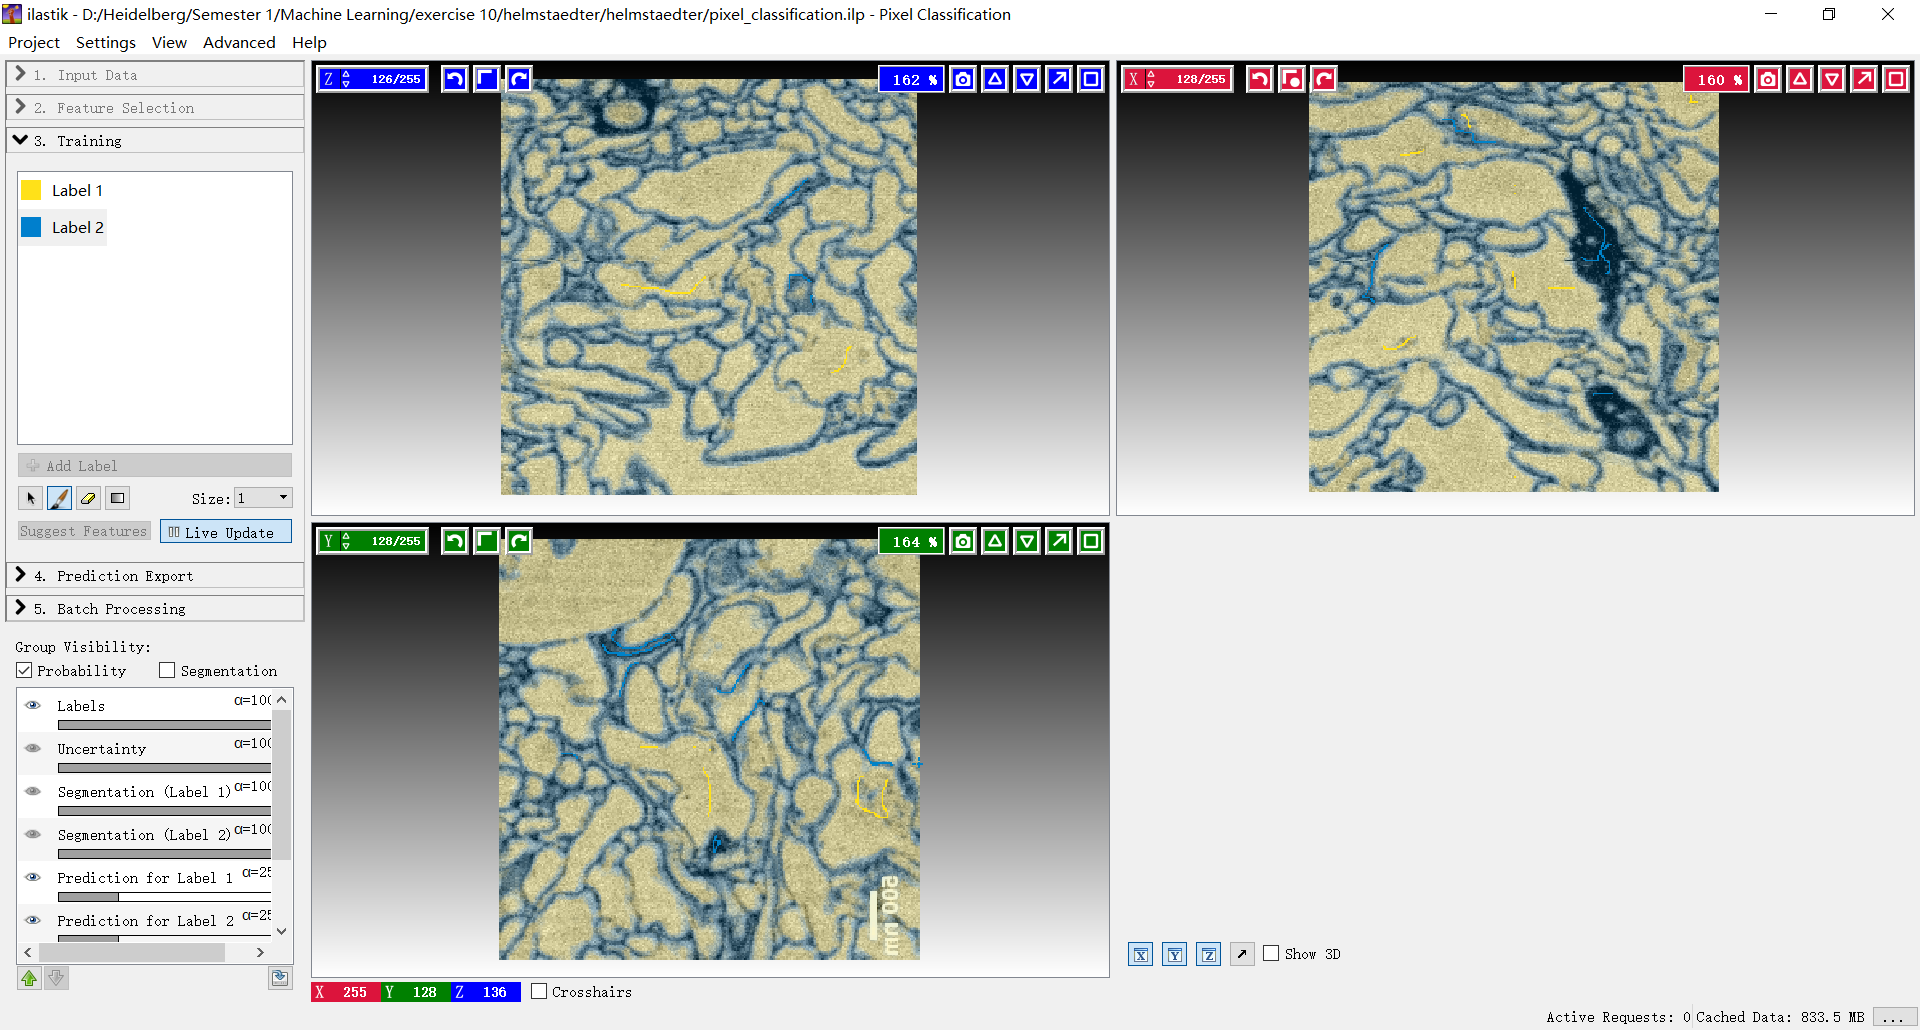

In [66]:
Image(filename = "04Train the classifier.PNG")

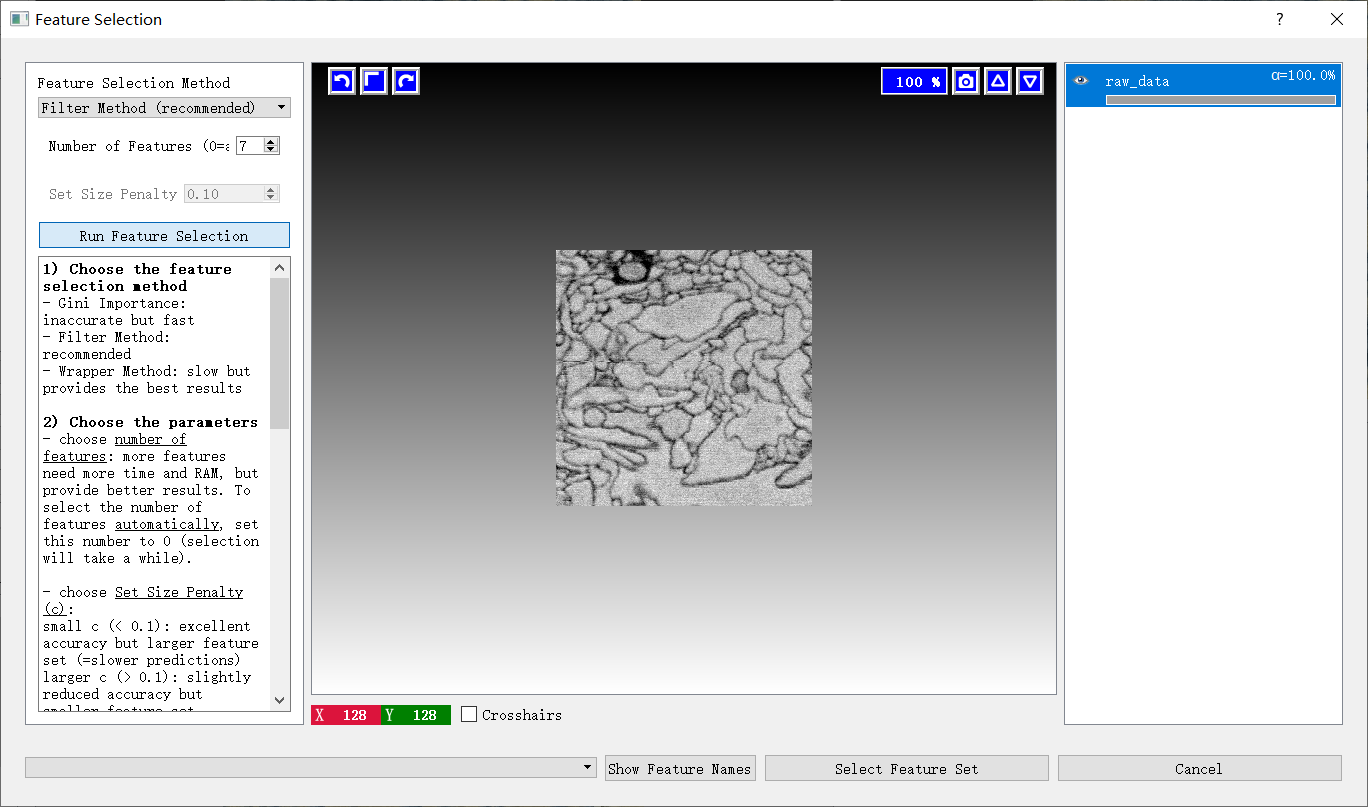

In [67]:
Image(filename = "05Suggest features.PNG")

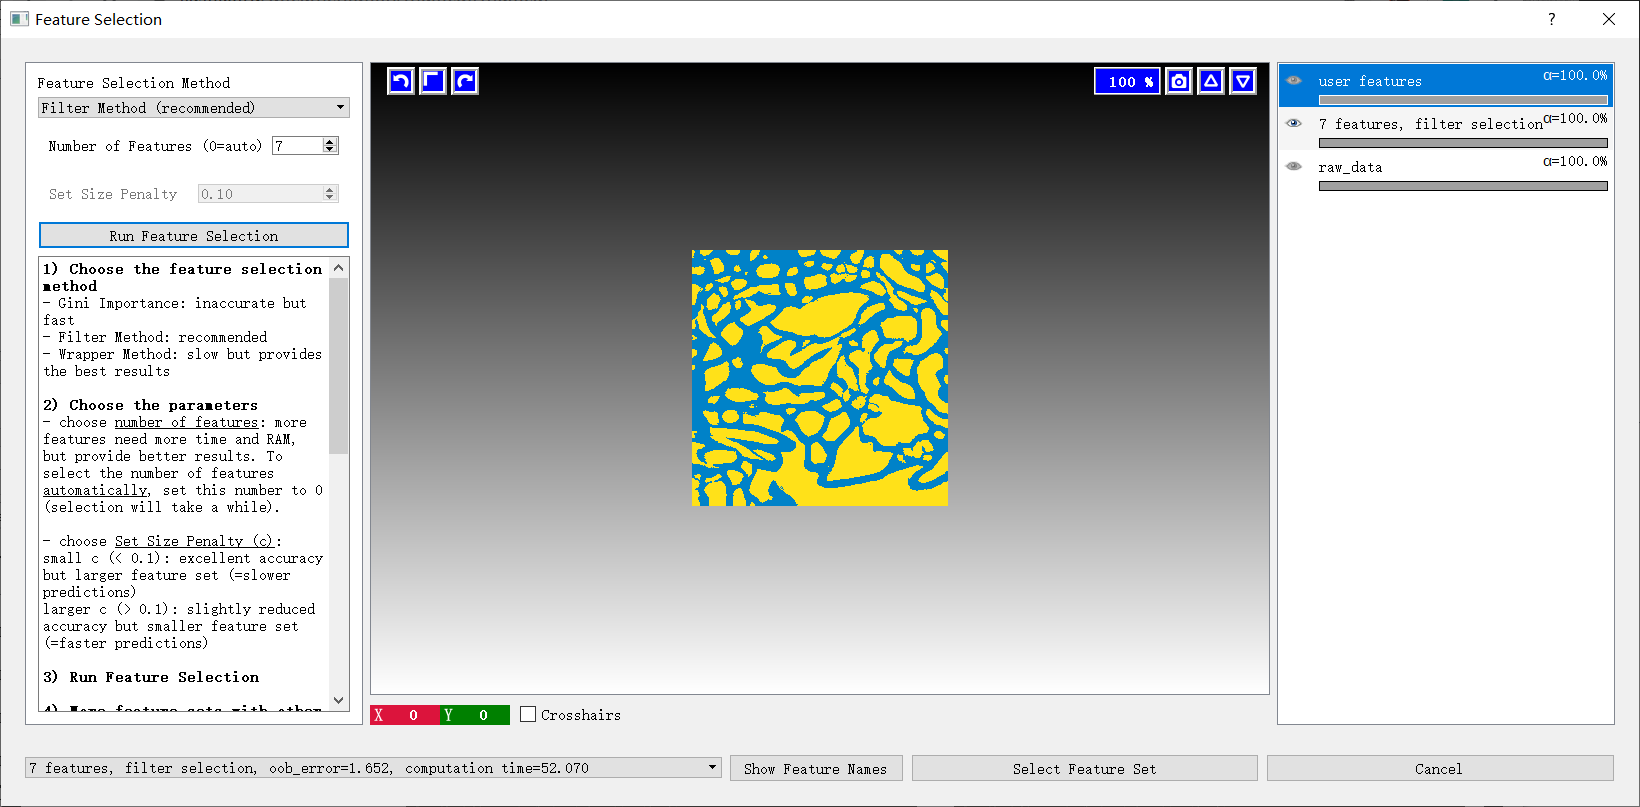

In [68]:
Image(filename = "06Select 7 best features.PNG")

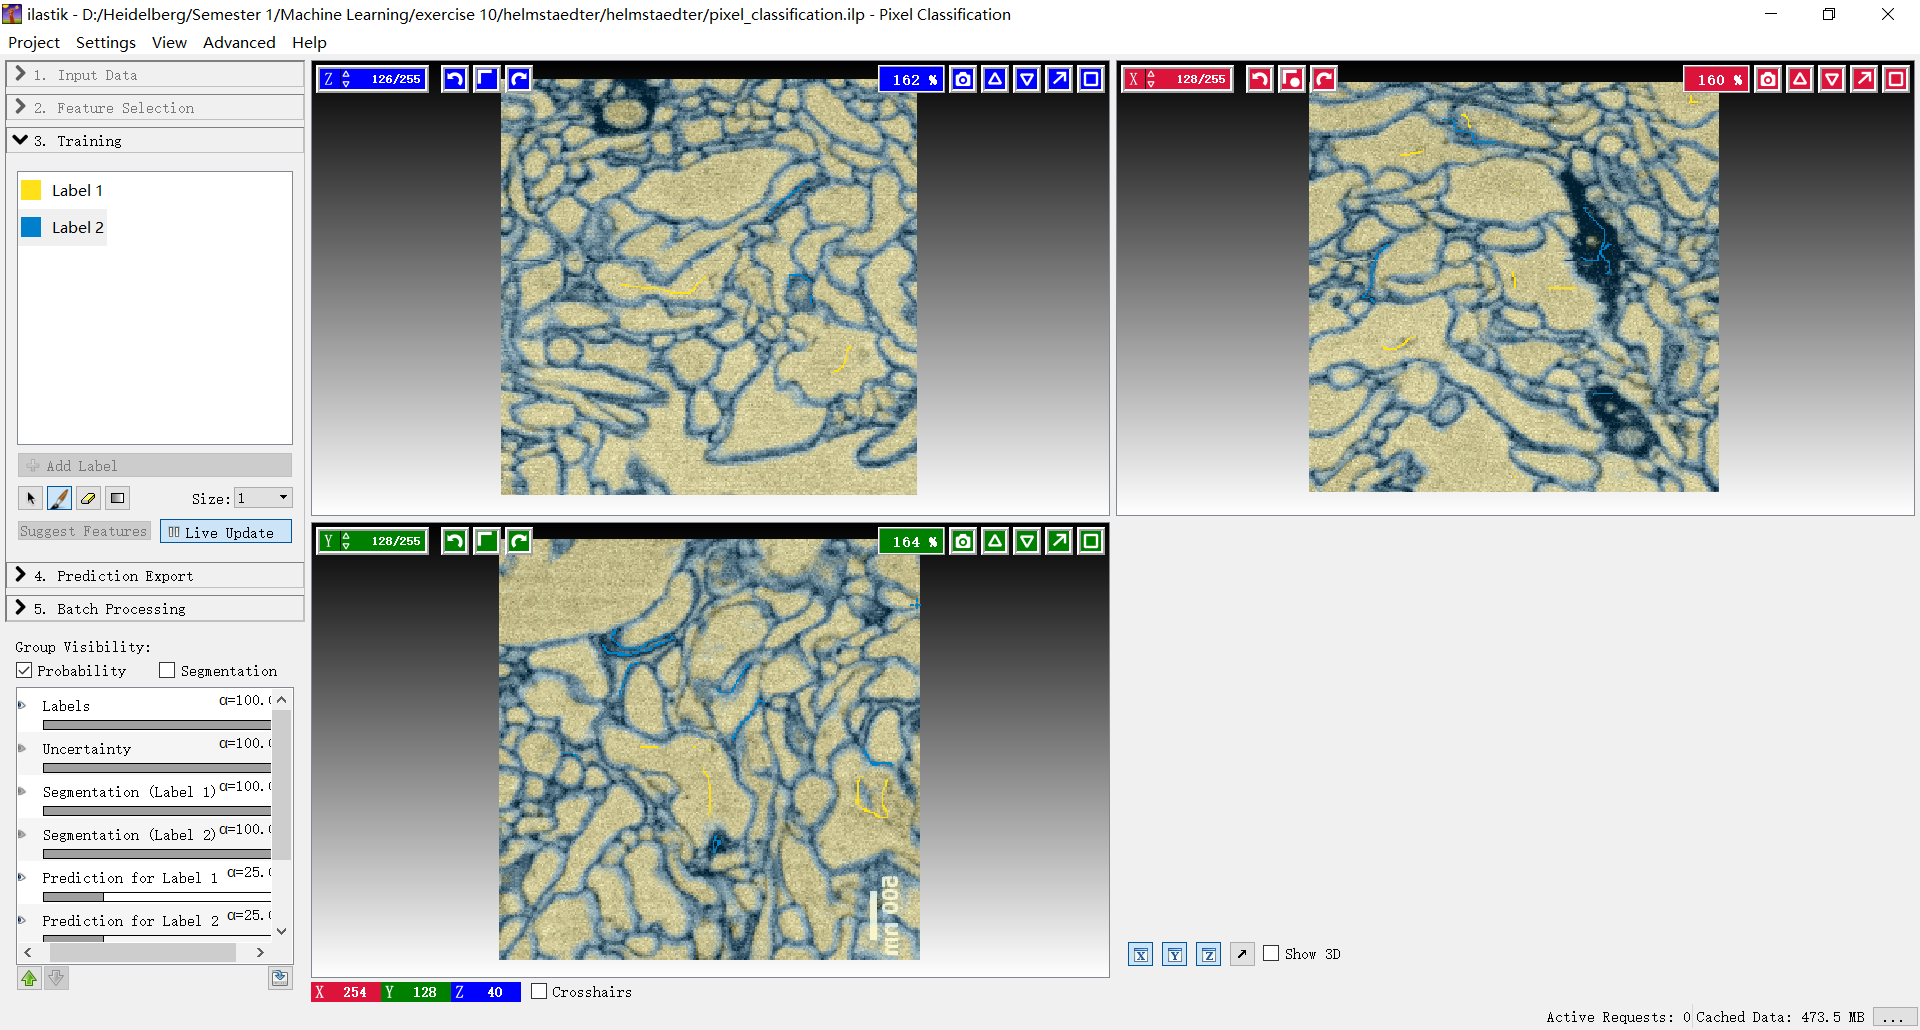

In [69]:
Image(filename = "07Update the clasifier.PNG")

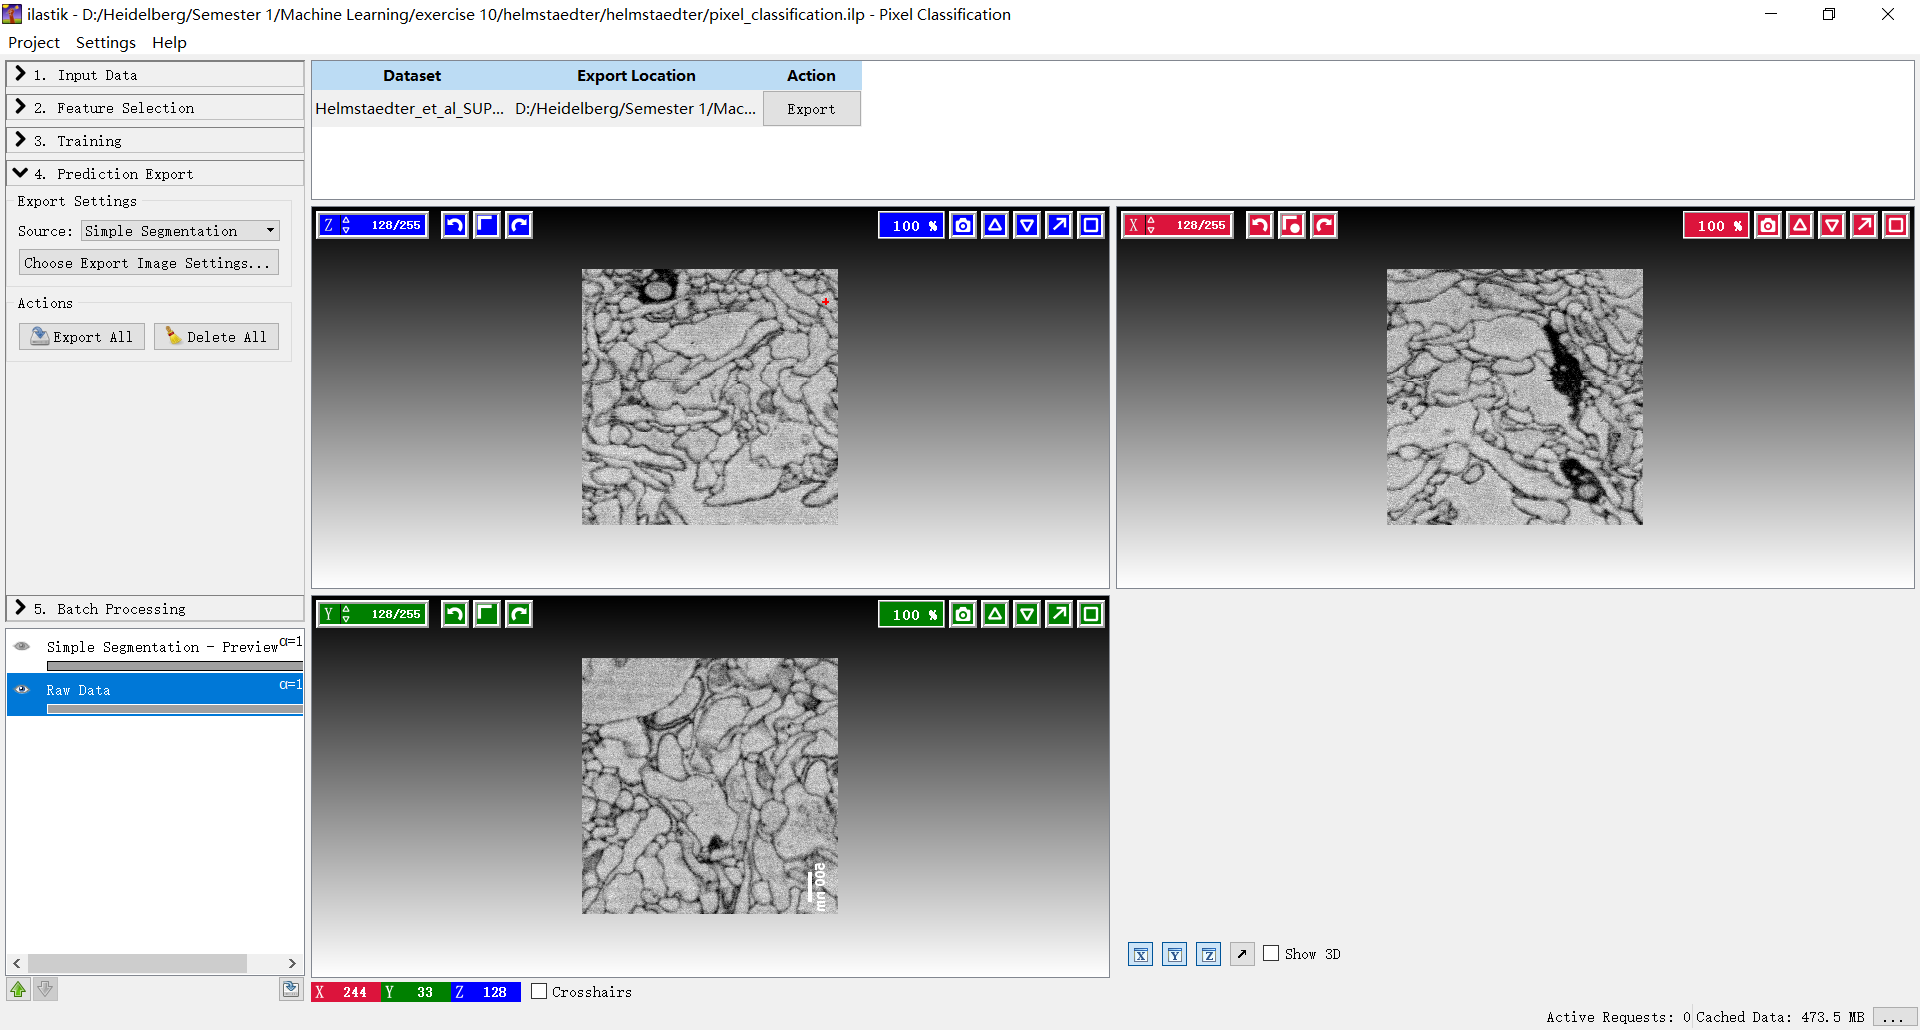

In [70]:
Image(filename = "08Expert the map with simple Segmentation.PNG")

#### iii)

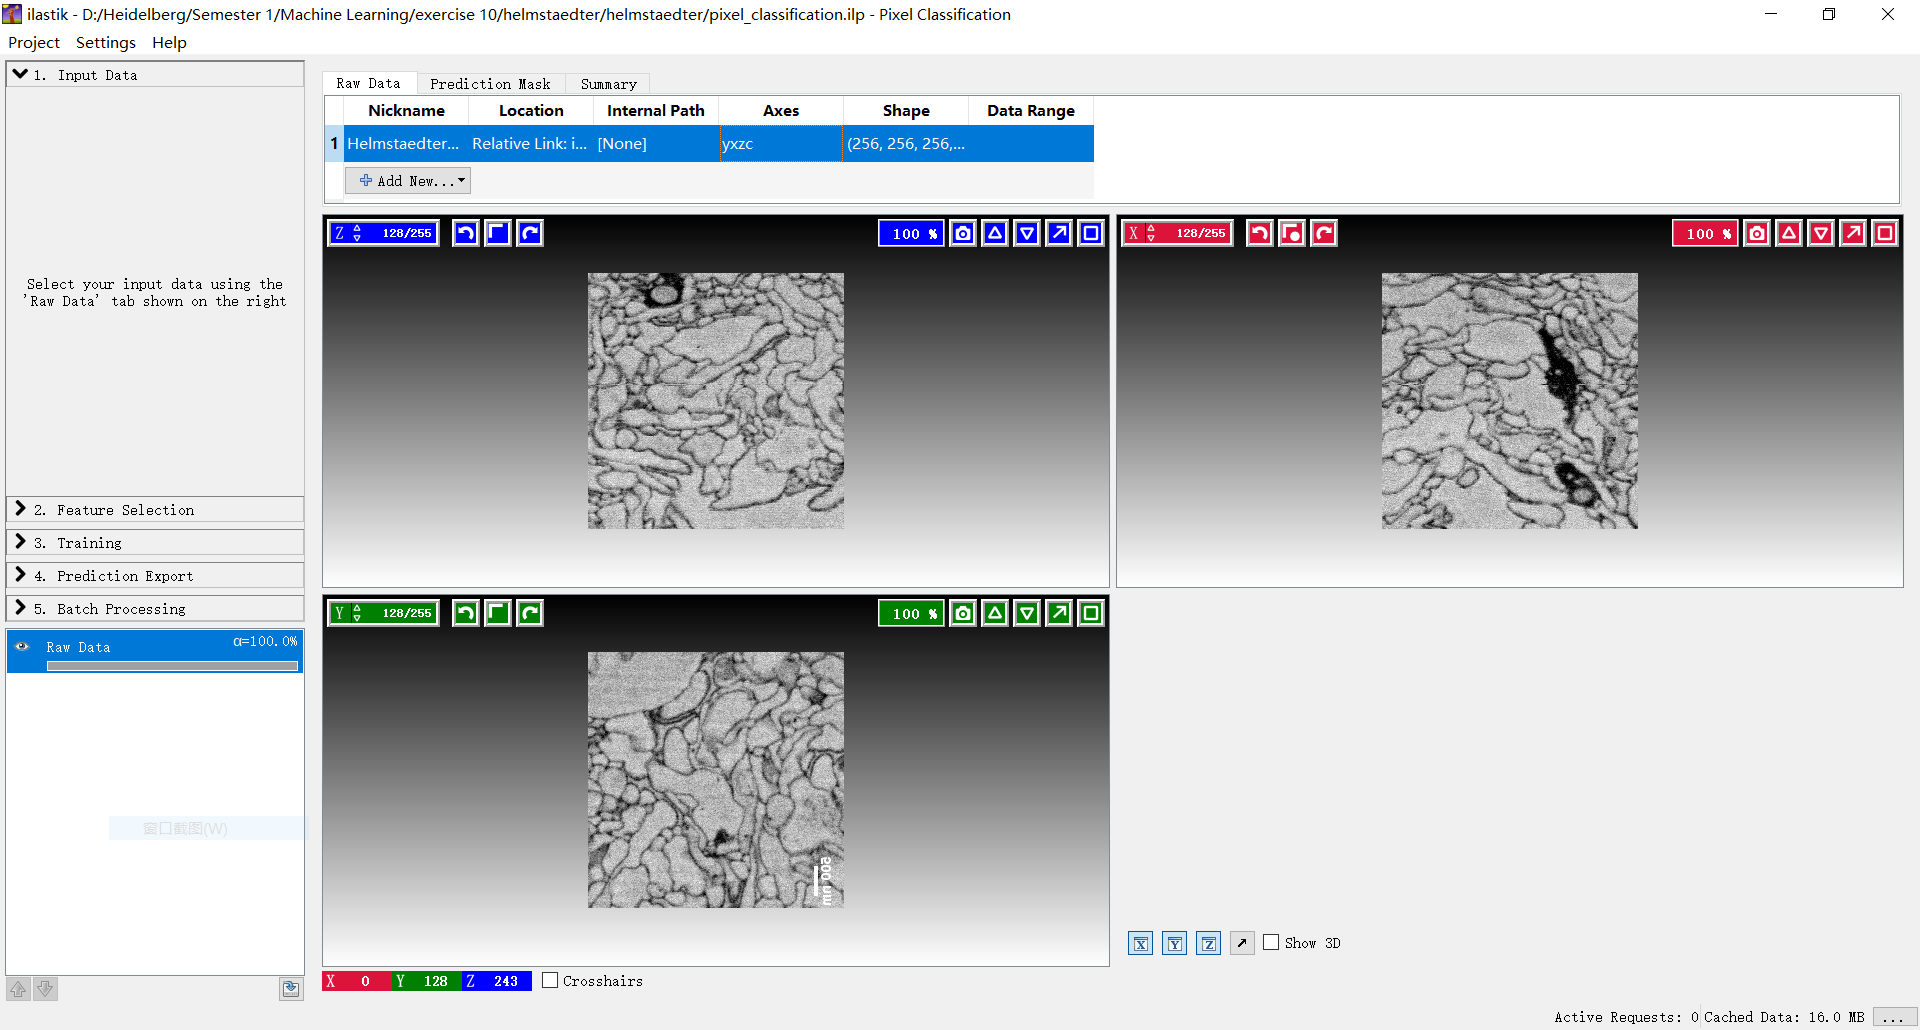

In [76]:
Image(filename = "01Select the raw data.PNG")

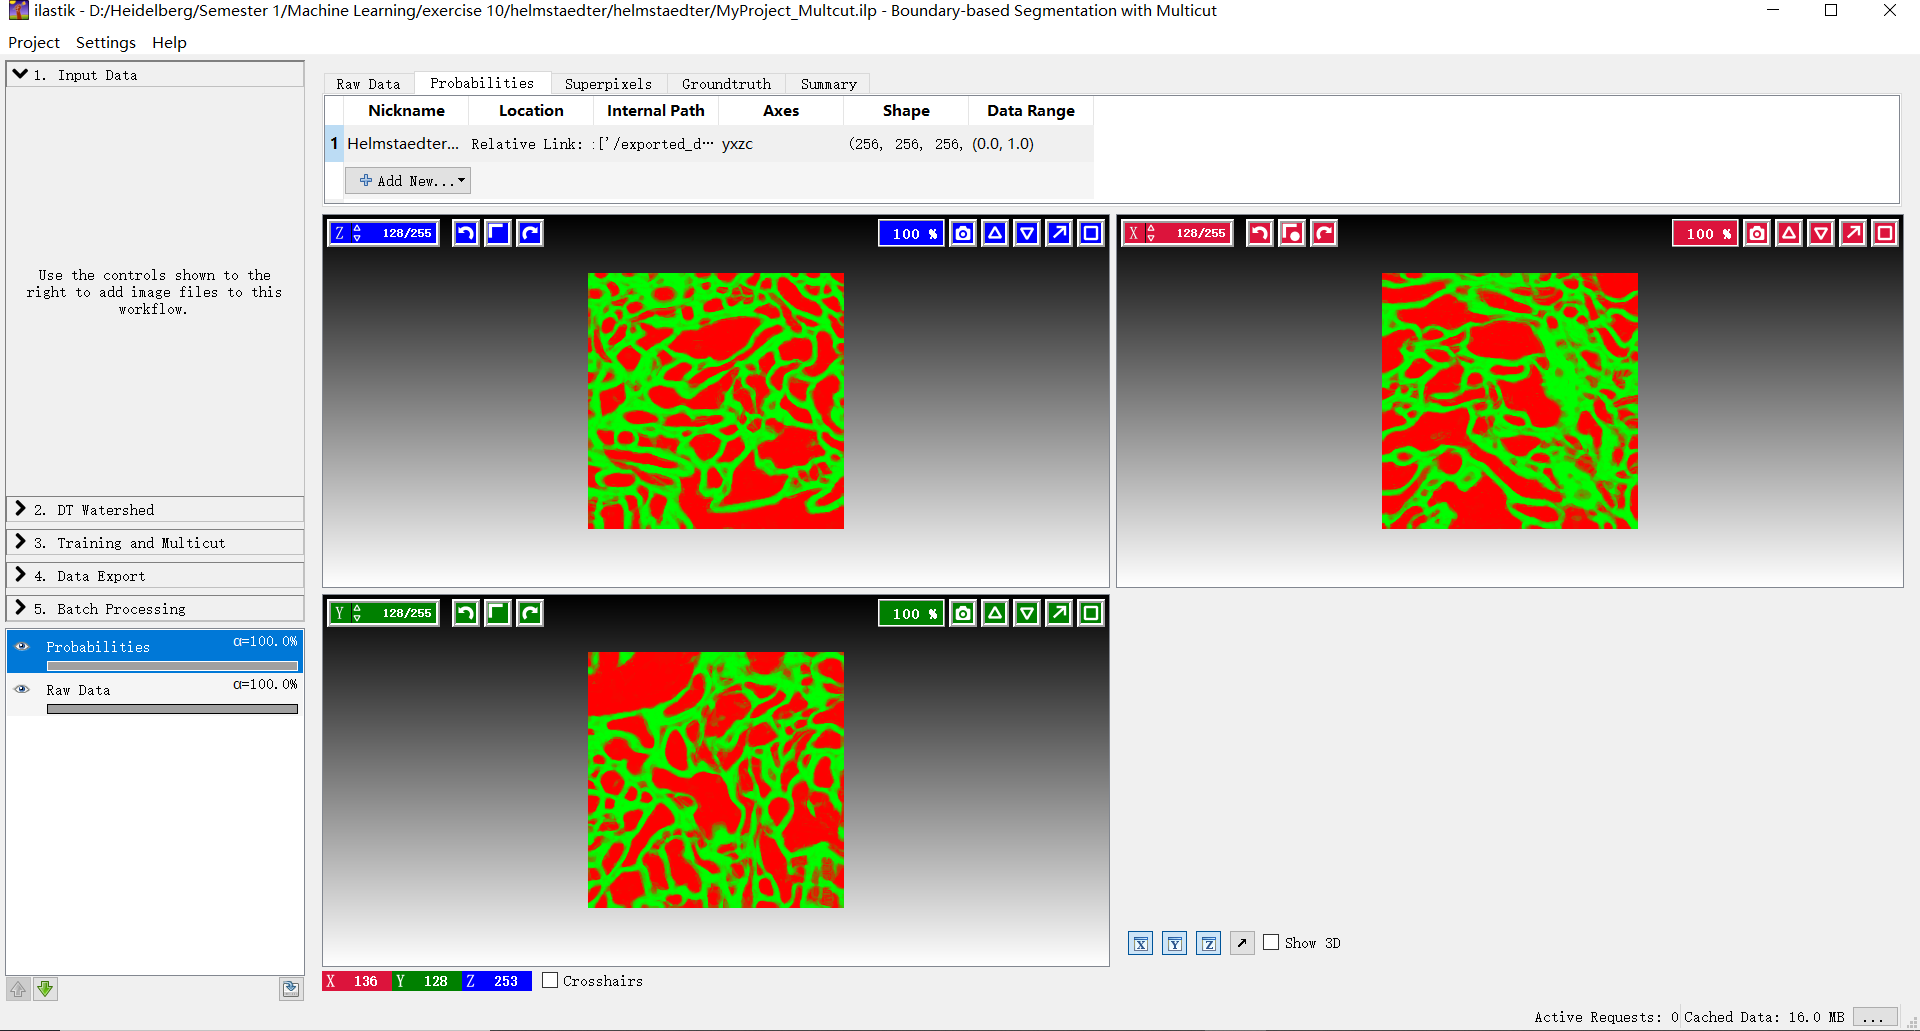

In [77]:
Image(filename = "02Select probabilities data.PNG")

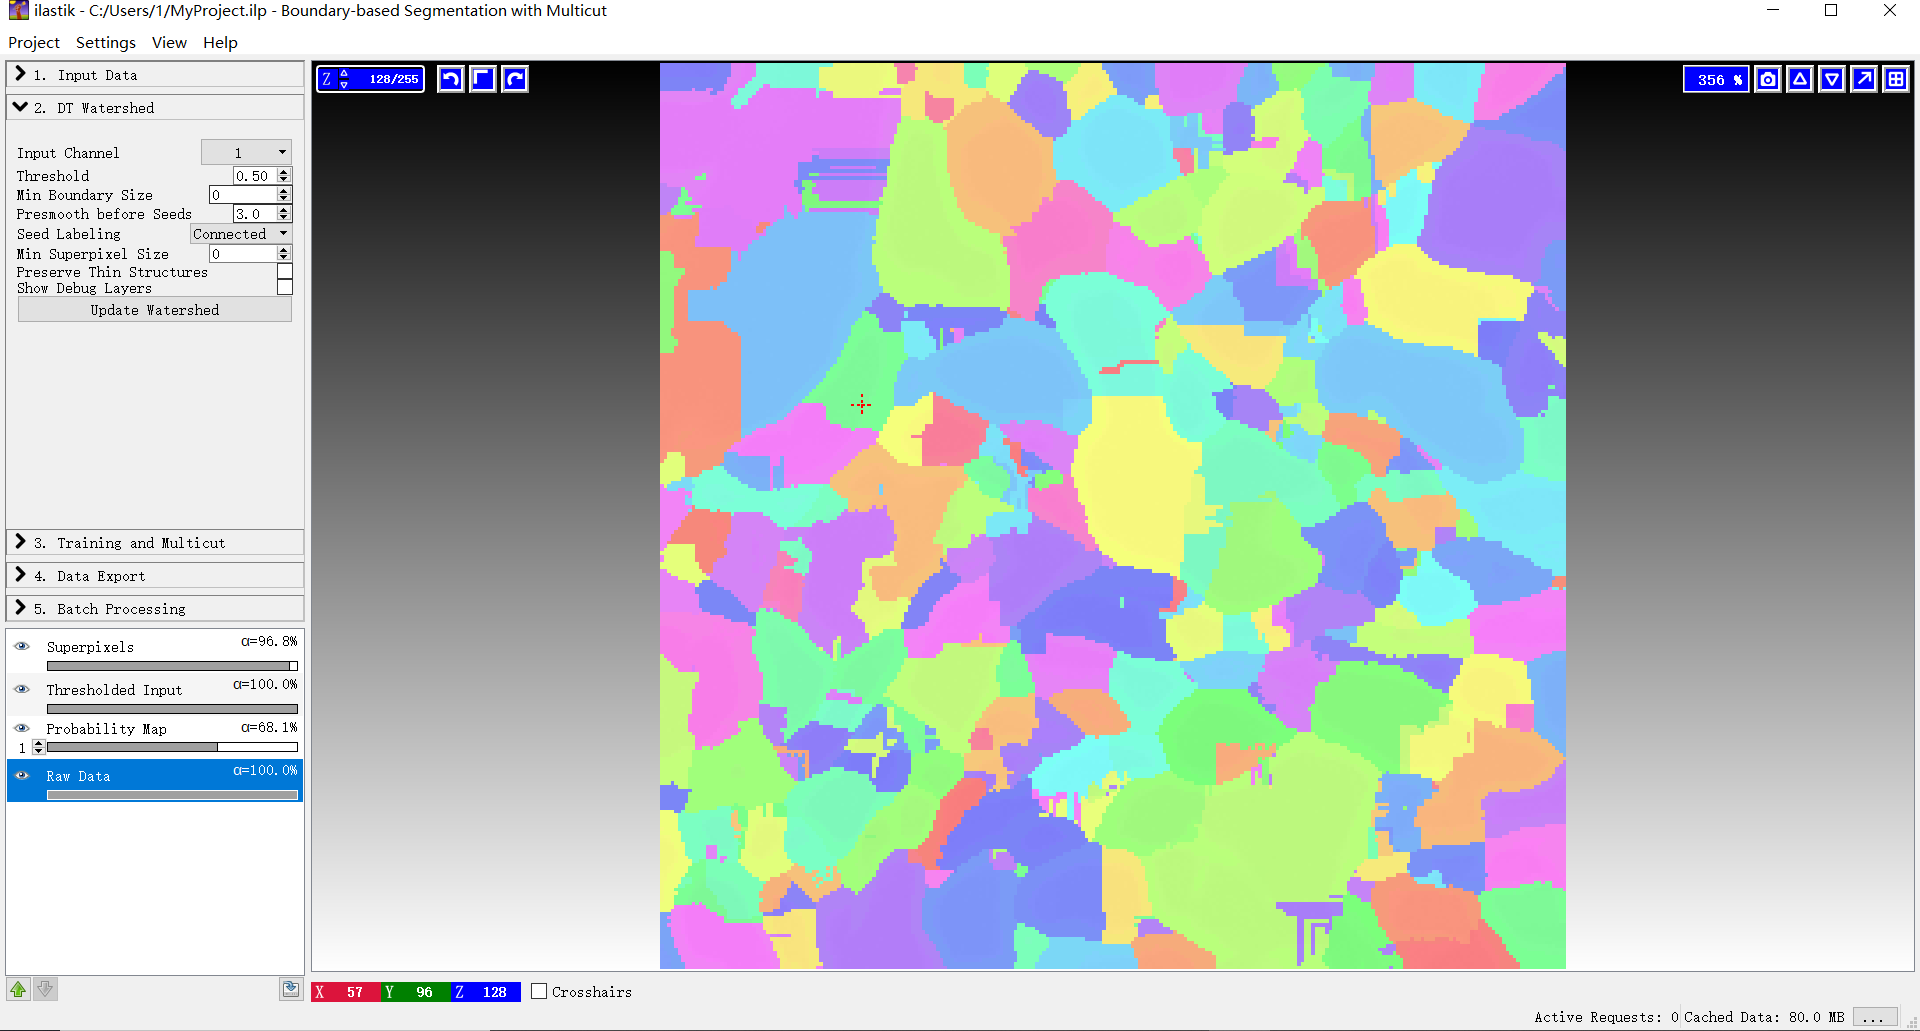

In [78]:
Image(filename = "03DT Watershed.PNG")

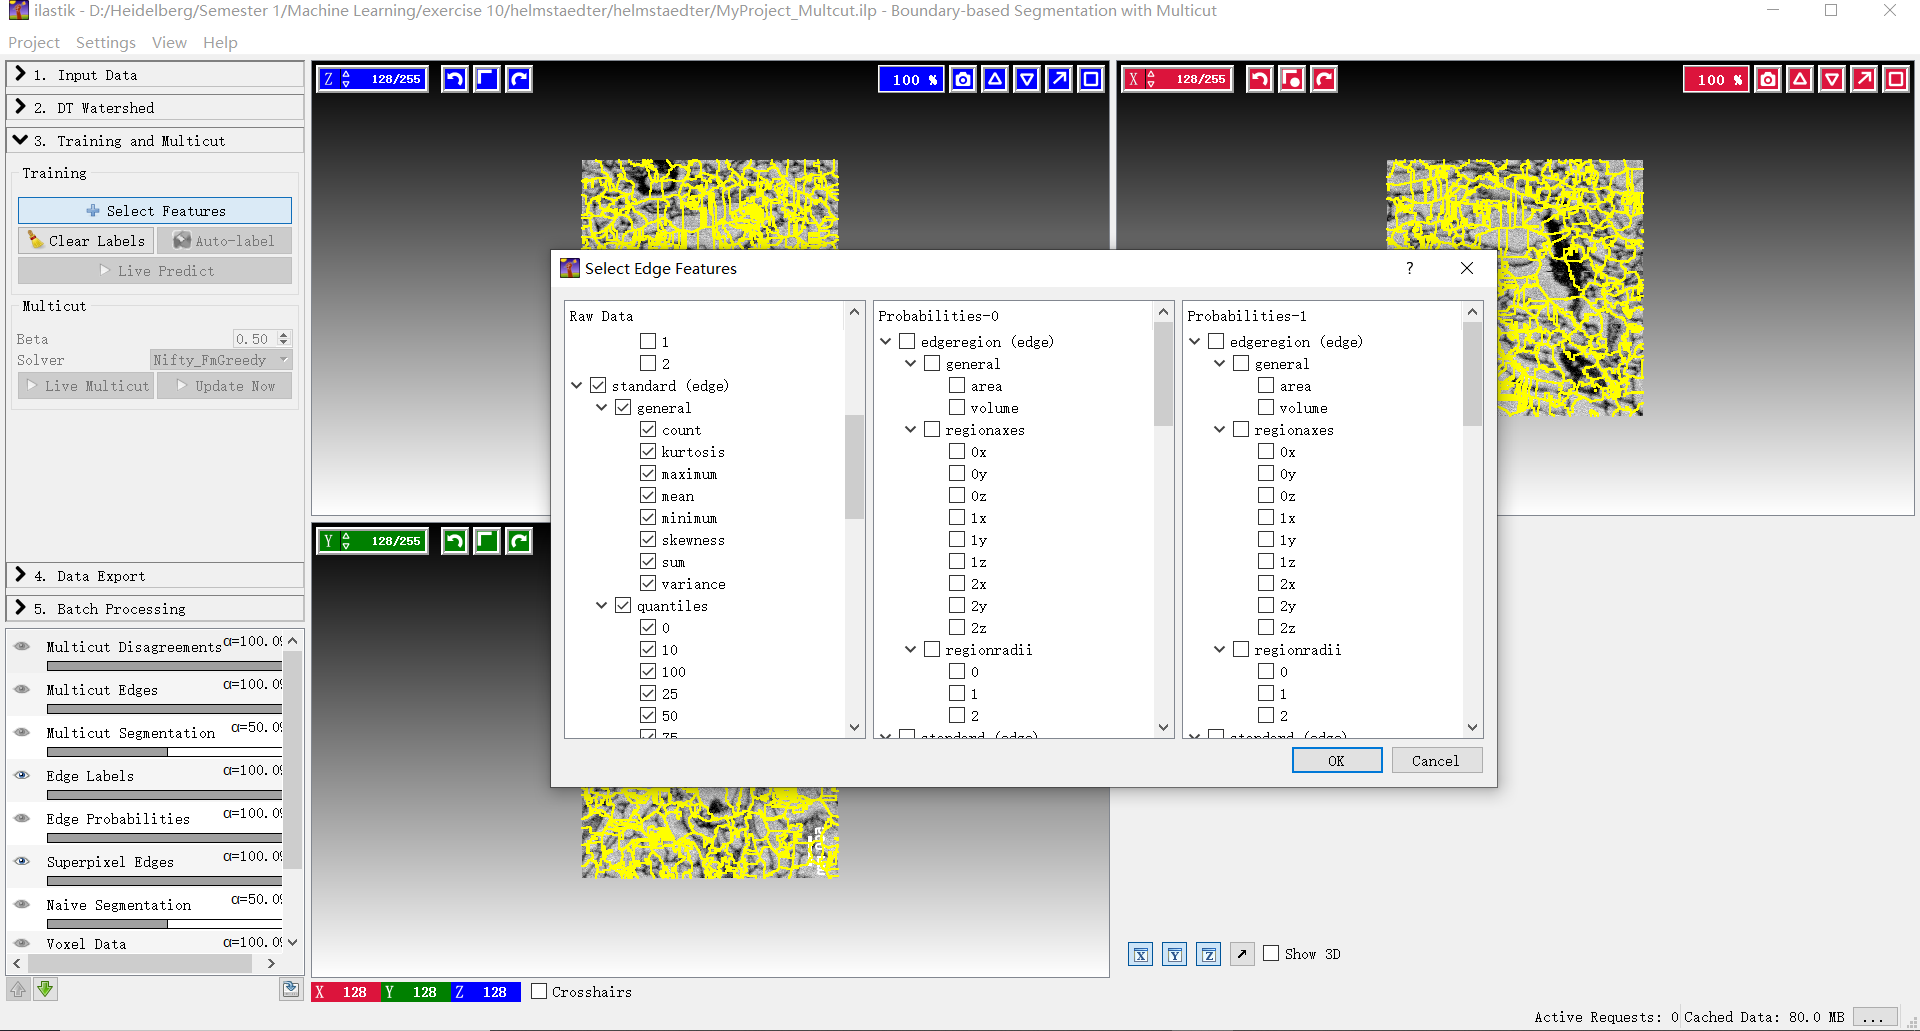

In [79]:
Image(filename = "04Select Edge Features.PNG")

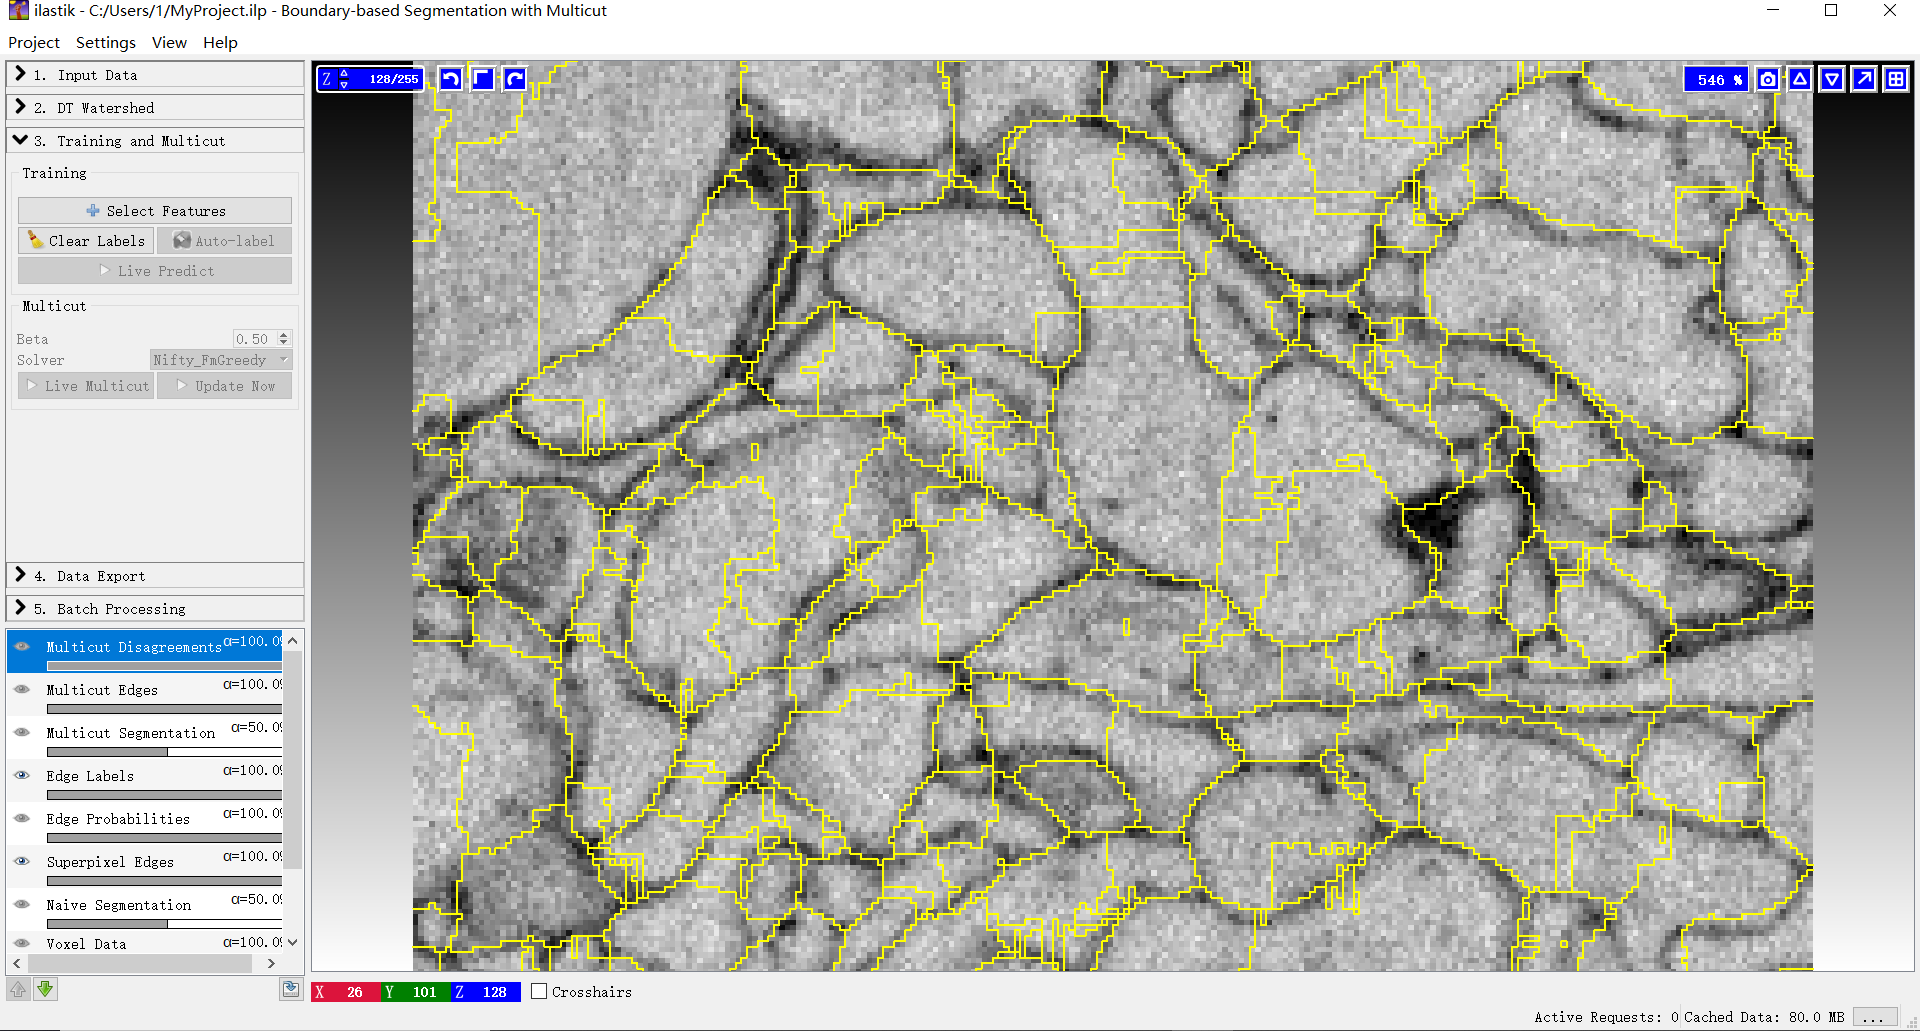

In [80]:
Image(filename = "05Training and Multicut.PNG")

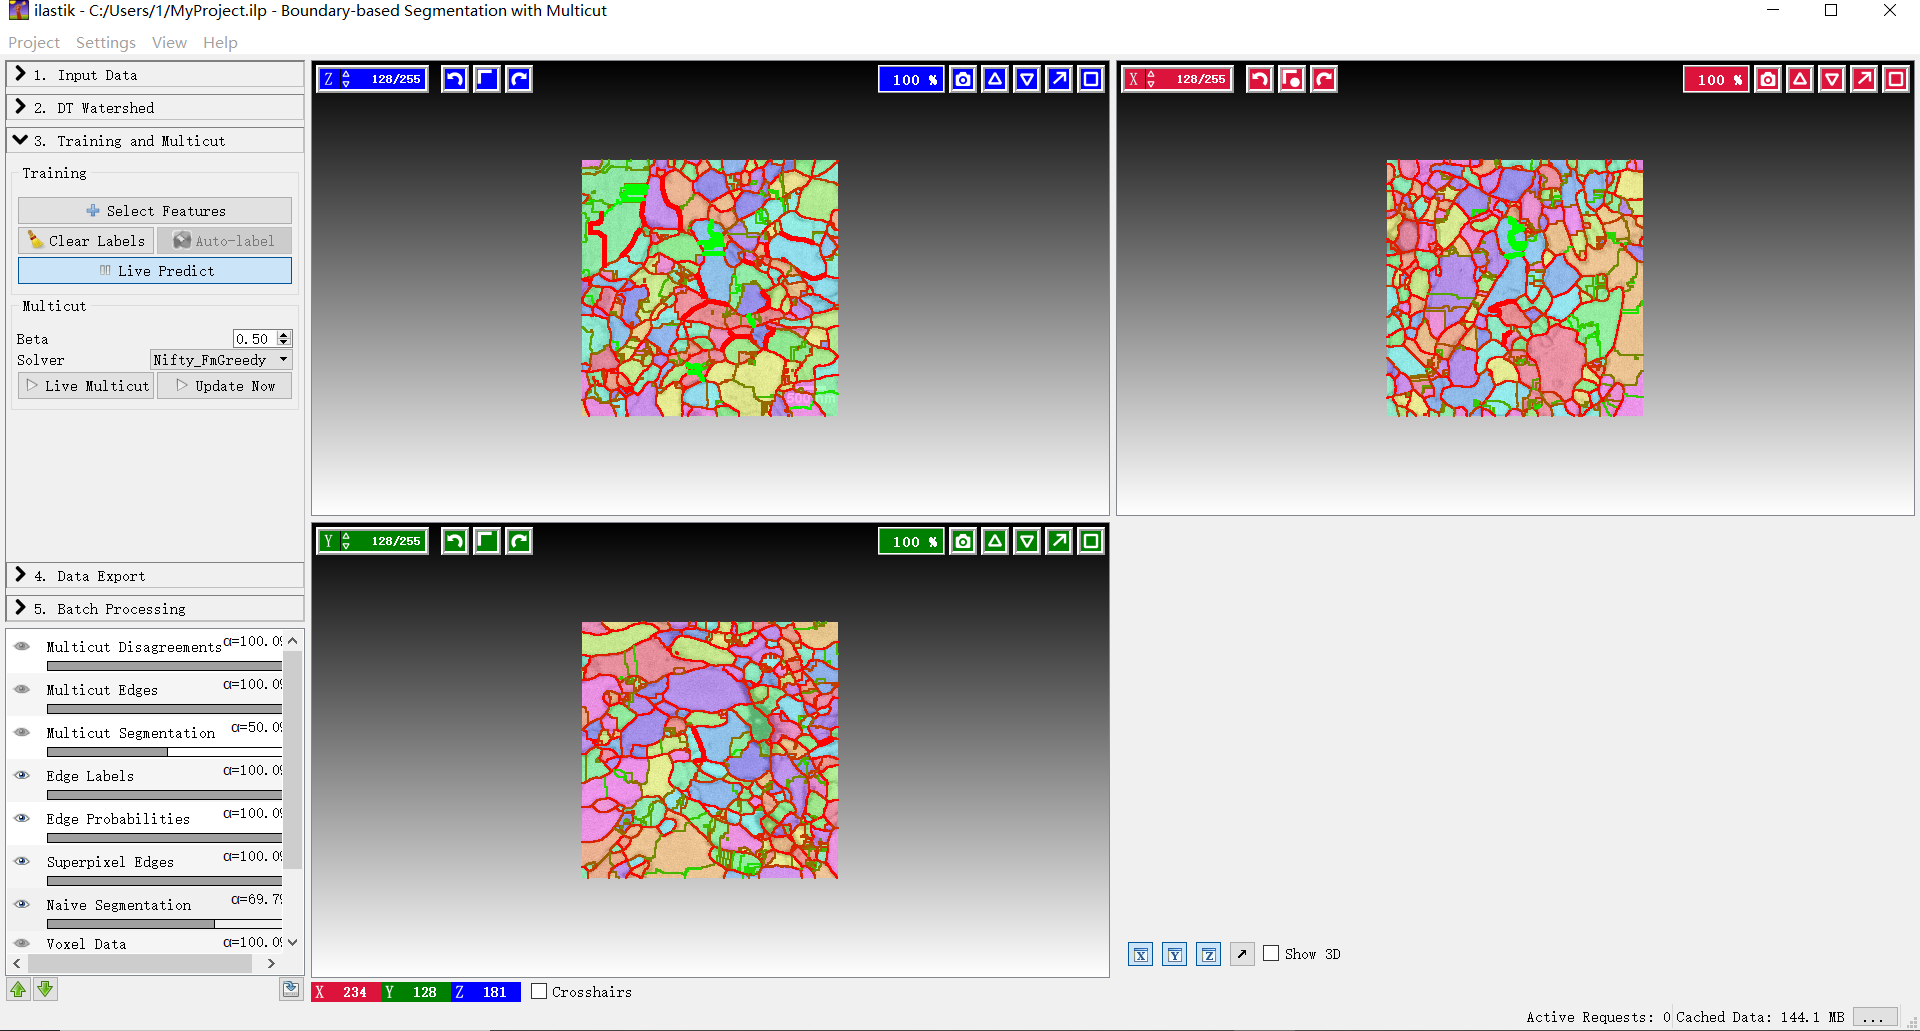

In [82]:
Image(filename = "06Show naive Segmentation.PNG")

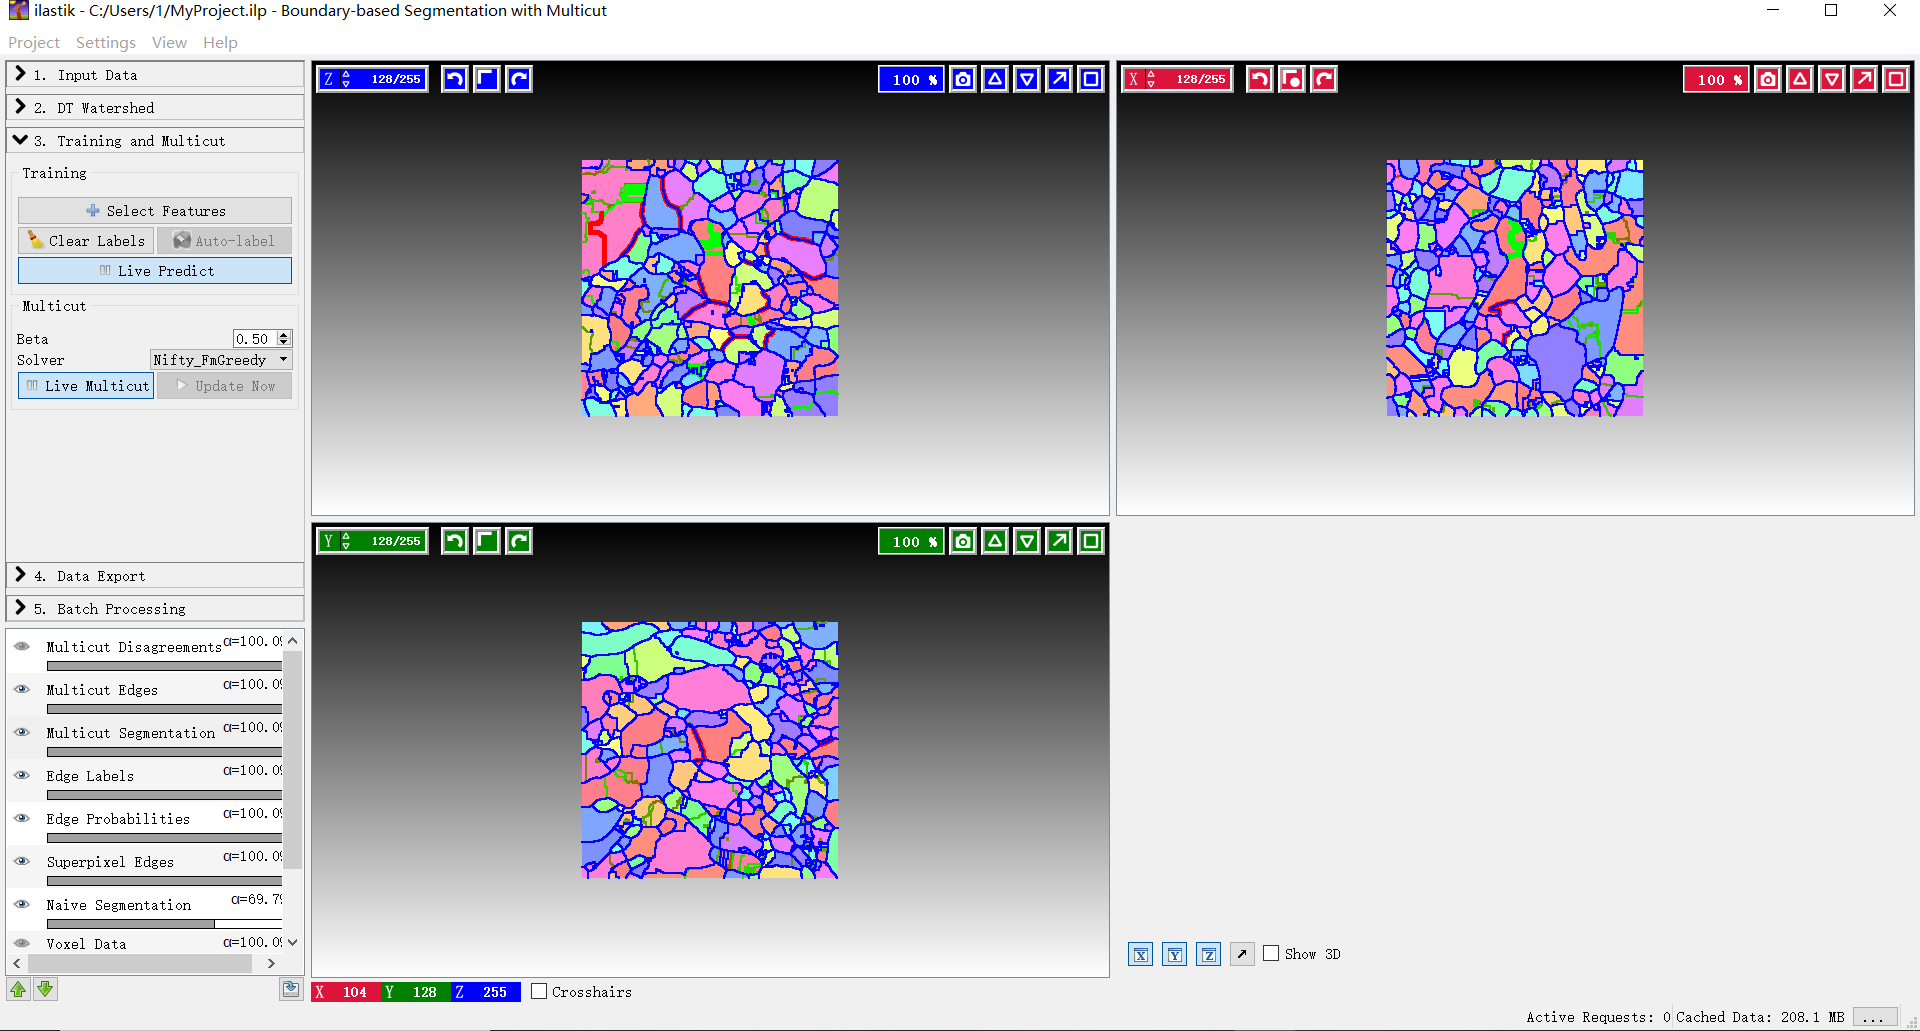

In [83]:
Image(filename = "07Show the Multicut result.PNG")

# 3 Integer Linear Program

In [94]:
def transform(n, x, num):
    """
     n is the decimal number to be converted, and x is the mechanism.
     e.g, when inputs n = 242 and mechanism x = 3, then output is [2, 2, 2, 2, 2]
     """
    a=[0,1,2,3,4,5,6,7,8,9]
    b=[]
    while True:
        s = n//x
        y = n % x
        b = b + [y]
        if s == 0:
            break
        n = s
    b.reverse()
    c = []
    for i in b:
        c.append(int(a[i]))
    while(len(c) < num):
        c.insert(0, 0)  # zero padding
    return c

In [110]:
weights = np.array([0.1, 0.6, 0.9, -1.2])
labeling = []
for i in range(2**4):
    labeling.append(transform(i, 2, 4))
labeling = np.reshape(labeling, (16, -1))
labeling

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1]])

In [102]:
energy = weights.dot(labeling.T)
energy

array([ 0. , -1.2,  0.9, -0.3,  0.6, -0.6,  1.5,  0.3,  0.1, -1.1,  1. ,
       -0.2,  0.7, -0.5,  1.6,  0.4])

In [112]:
opti_labeling = np.argmin(energy)
labeling[opti_labeling]

array([0, 0, 0, 1])